In [1]:
import torch
import torch.nn as nn
import torchtext.data as ttd
from torchtext.vocab import GloVe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("dataset_finalized.csv",index_col=0)
df['classification'] = df['classification'].map({'left': 0, 'right': 1})
tonkenized_df = pd.DataFrame()
tokenizer = ttd.utils.get_tokenizer("toktok")
for index , row in df.iterrows(): 
    js = {
        "text": tokenizer(row["text"]),
        "classification": row["classification"]
    }
    tonkenized_df = tonkenized_df.append(js,ignore_index = True)

tonkenized_df

,text,classification
0,"[Opinion, &#124;, Glenn, Youngkin, ’, s, No-Gu...",0.0
1,"[Opinion, &#124;, Glenn, Youngkin, ’, s, No-Gu...",0.0
2,"[Won, ', t, be, long, ,, and, they, ', ll, be,...",0.0
3,"[Federal, Standards, for, education, are, need...",0.0
4,"[They, don, ', t, want, to, be, made, uncomfor...",0.0
...,...,...
28121,"[Remember, when, talking, about, covid, or, th...",1.0
28122,"[When, the, science, changes, to, match, the, ...",1.0
28123,"[I, personally, can, ', t, wait, for, covid, t...",1.0
28124,"[I, keep, seeing, people, say, this, but, what...",1.0


In [3]:
tonkenized_df["text"]

0        [Opinion, &#124;, Glenn, Youngkin, ’, s, No-Gu...
1        [Opinion, &#124;, Glenn, Youngkin, ’, s, No-Gu...
2        [Won, ', t, be, long, ,, and, they, ', ll, be,...
3        [Federal, Standards, for, education, are, need...
4        [They, don, ', t, want, to, be, made, uncomfor...
                               ...                        
28121    [Remember, when, talking, about, covid, or, th...
28122    [When, the, science, changes, to, match, the, ...
28123    [I, personally, can, ', t, wait, for, covid, t...
28124    [I, keep, seeing, people, say, this, but, what...
28125    [If, they, had, given, mRNA, “vaccines, ”, mor...
Name: text, Length: 28126, dtype: object

(array([0.000e+00, 0.000e+00, 5.000e+00, 1.000e+01, 2.500e+01, 2.500e+01,
        4.200e+01, 9.700e+01, 3.540e+02, 8.790e+02, 1.059e+03, 1.372e+03,
        1.346e+03, 1.327e+03, 1.245e+03, 1.273e+03, 1.111e+03, 1.047e+03,
        9.800e+02, 9.040e+02, 8.380e+02, 7.890e+02, 7.260e+02, 6.690e+02,
        6.300e+02, 5.910e+02, 5.980e+02, 5.350e+02, 4.840e+02, 4.560e+02,
        4.380e+02, 4.080e+02, 3.680e+02, 4.590e+02, 3.150e+02, 3.160e+02,
        3.030e+02, 2.760e+02, 3.090e+02, 2.480e+02, 2.430e+02, 2.300e+02,
        2.380e+02, 2.090e+02, 1.870e+02, 1.620e+02, 1.860e+02, 1.610e+02,
        1.680e+02, 1.390e+02, 1.220e+02, 1.410e+02, 1.420e+02, 1.300e+02,
        1.210e+02, 1.040e+02, 1.100e+02, 1.140e+02, 7.800e+01, 1.090e+02,
        1.020e+02, 8.000e+01, 7.400e+01, 7.100e+01, 8.000e+01, 8.200e+01,
        5.700e+01, 7.100e+01, 6.400e+01, 6.400e+01, 5.600e+01, 5.900e+01,
        4.700e+01, 5.400e+01, 4.100e+01, 4.400e+01, 4.200e+01, 6.000e+01,
        3.900e+01, 3.200e+01, 2.500e+0

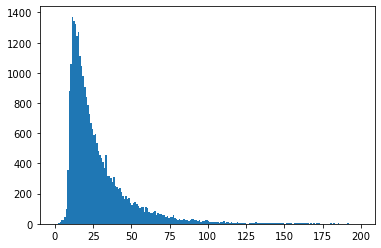

In [4]:
length  = []
for text in tonkenized_df["text"]:
    length.append(len(text))
plt.hist(length,bins=np.arange(0, 200))

In [5]:
vec  = GloVe("twitter.27B",dim=25)
vec.get_vecs_by_tokens(tonkenized_df.iloc[4]["text"])

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-5.5814e-01,  7.3198e-01, -1.4123e-01,  7.0702e-01, -4.3387e-01,
         -2.8708e-01, -4.6091e-01,  1.7632e+00,  6.6918e-02, -5.2153e-01,
         -4.1592e-01, -7.0236e-01, -3.0633e+00, -6.0575e-02,  7.0095e-01,
         -1.0135e-01,  7.2264e-01,  5.9836e-02, -5.2989e-02, -1.9694e-01,
          7.7576e-01,  5.6437e-01, -1.3116e-03,  5.0619e-02,  2.8799e-01],
        [ 4.4205e-01, -6.7697e-01, -7.9938e-02,  8.9579e-01, -4.3245e-02,
          3.5863e-01,  5.1735e-01,  1.4330e+00, -2.1658e-01,  9.3923e-01,
          3.6207e-01, -2.7295e-01, -3.4128e+00,  4.6583e-01, -8.7769e-01,
         -4.2464e-01, -1.3648e+00,  

In [6]:
length = 50
def getvec(tensor, length):
    if tensor.size()[0] > length:
        return tensor[0:length,:]
    m = nn.ZeroPad2d((0, 0, length-tensor.size()[0], 0))
    return m(tensor)


In [7]:
X = torch.zeros(len(df),length,25)

for index , row in df.iterrows(): 
    ret = vec.get_vecs_by_tokens(tonkenized_df.iloc[index]["text"], lower_case_backup=True)
    ret = getvec(ret, 50)
    X[index, :,:] = ret
print(X)

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-0.7283, -1.6362, -1.7241,  ...,  0.5071, -0.8709, -0.8151],
         [-0.4473, -0.8417,  0.4949,  ...,  0.5016, -0.7426, -0.1845],
         [ 0.6153,  0.4090, -0.3422,  ..., -0.4323, -0.9998, -0.6808]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-0.7283, -1.6362, -1.7241,  ...,  0.5071, -0.8709, -0.8151],
         [-0.4473, -0.8417,  0.4949,  ...,  0.5016, -0.7426, -0.1845],
         [ 0.6153,  0.4090, -0.3422,  ..., -0.4323, -0.9998, -0.6808]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

In [8]:
X.size()

torch.Size([28126, 50, 25])

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
Y = torch.tensor(tonkenized_df["classification"].astype(np.float32)).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=49)
X_test, X_train = X_test.to(device), X_train.to(device)
y_test, y_train = y_test.to(device), y_train.to(device)

In [11]:
class RNN(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_rnnlayers, num_outputs):
        super(RNN, self).__init__()
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_rnnlayers = num_rnnlayers
        self.num_outputs = num_outputs
        self.sigmoid = nn.Sigmoid()
        self.rnn = nn.LSTM(
            input_size=self.num_inputs,
            hidden_size=self.num_hidden,
            num_layers=self.num_rnnlayers,
            batch_first=True)
        self.fc = nn.Linear(self.num_hidden, self.num_outputs)
    def forward(self,X): 
        h0 = torch.zeros(self.num_rnnlayers, X.size(0),
                         self.num_hidden,device = device)
        c0 = torch.zeros(self.num_rnnlayers, X.size(0),
                         self.num_hidden,device = device)
        out, _ = self.rnn(X, (h0, c0))
        out, _ = torch.max(out, 1)
        out = self.fc(out)

        return out

In [12]:
model = RNN(num_inputs=25, num_hidden=50, num_rnnlayers=2, num_outputs=1)
model.to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 1e-4)

In [13]:
num_epochs = 3000 #model overfits after 3000 epochs
loss_train_list = np.zeros(num_epochs)
loss_test_list = np.zeros(num_epochs)
acc_train_list = np.zeros(num_epochs)
acc_test_list = np.zeros(num_epochs)
for i in range(num_epochs):
    optimizer.zero_grad()
    y_result = model(X_train)
    loss_train = criterion(y_result,y_train)
    loss_train_list[i] = loss_train.item()

    train_acc = np.mean(np.round(y_result.cpu().detach().numpy()) == np.round(y_train.cpu().detach().numpy()))
    acc_train_list[i] = train_acc
    
    y_result = model(X_test)
    loss_test = criterion(y_result,y_test)
    loss_test_list[i] = loss_test.item()
    
    test_acc = np.mean(np.round(y_result.cpu().detach().numpy()) == np.round(y_test.cpu().detach().numpy()))
    acc_test_list[i] = test_acc

    loss_train.backward()
    optimizer.step()

plt.plot(loss_train_list, label = "loss_train_list")
plt.plot(loss_test_list, label = "loss_test_list")
plt.legend()
plt.show()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.